In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.plotly as py
%matplotlib inline

In [62]:
data = pd.read_csv('./Current_Employee_Names__Salaries__and_Position_Titles.csv')
filtered_data = data[data['Annual Salary'].notnull()]

In [3]:
data['Annual Salary'].describe()

count     25741.000000
mean      87585.423042
std       20949.615385
min       12840.000000
25%       75408.000000
50%       90024.000000
75%       97440.000000
max      275004.000000
Name: Annual Salary, dtype: float64

In [66]:
top = filtered_data.sort_values('Annual Salary', ascending=False)
top.head(26)

Name                                   Job Titles  \
24942            RHEE,  JAMIE L                     COMMISSIONER OF AVIATION   
14352         JOHNSON,  EDDIE T                     SUPERINTENDENT OF POLICE   
8270             EMANUEL,  RAHM                                        MAYOR   
9290        FORD II,  RICHARD C                            FIRE COMMISSIONER   
21138    NANCE HOLT,  ANNETTE M               FIRST DEPUTY FIRE COMMISSIONER   
24963        RICCIO,  ANTHONY J                  FIRST DEPUTY SUPERINTENDENT   
6803             DEAL,  AARON J                               CHIEF OF STAFF   
12414           HELMOLD,  BRIAN                     DEPUTY FIRE COMMISSIONER   
26571        SAMPEY,  TIMOTHY T                     DEPUTY FIRE COMMISSIONER   
28434       SOLUDCZYK,  JAMES P                     DEPUTY FIRE COMMISSIONER   
3045       BRODERSEN,  ERNEST F                     DEPUTY FIRE COMMISSIONER   
28761       STAPLES,  MELISSA A                                        CHIEF   
26679            SANCHEZ,  NOEL                                        CHIEF   
32070          WEST,  BARBARA J                                        CHIEF   
16850        LEWIN,  JONATHAN H                                        CHIEF   
31581           WALLER,  FRED L                                        CHIEF   
3861         CALLOWAY,  KEITH A                                        CHIEF   
27571         SHERIDAN,  MARY L                ASST DEPUTY FIRE COMMISSIONER   
10103            GARR,  BARRY J                ASST DEPUTY FIRE COMMISSIONER   
26130           ROY,  CHARLES R                ASST DEPUTY FIRE COMMISSIONER   
13189         HORAN,  JEFFREY A                ASST DEPUTY FIRE COMMISSIONER   
20548          MORITA,  JULIA Y                       COMMISSIONER OF HEALTH   
24745           REIFMAN,  DAVID       COMMISSIONER OF PLANNING & DEVELOPMENT   
20598  MORRISON BUTLER,  LISA V  COMMISSIONER OF FAMILY AND SUPPORT SERVICES   
2513            BOIK,  ROBERT A              SUPERINTENDENT'S CHIEF OF STAFF   
5654            COOGAN,  JOAN E                  FIRST DEPUTY CHIEF OF STAFF   

                     Department Full or Part-Time Salary or Hourly  \
24942                  AVIATION                 F           Salary   
14352                    POLICE                 F           Salary   
8270             MAYOR'S OFFICE                 F           Salary   
9290                       FIRE                 F           Salary   
21138                      FIRE                 F           Salary   
24963                    POLICE                 F           Salary   
6803             MAYOR'S OFFICE                 F           Salary   
12414                      FIRE                 F           Salary   
26571                      FIRE                 F           Salary   
28434                      FIRE                 F           Salary   
3045                       FIRE                 F           Salary   
28761                    POLICE                 F           Salary   
26679                    POLICE                 F           Salary   
32070                    POLICE                 F           Salary   
16850                    POLICE                 F           Salary   
31581                    POLICE                 F           Salary   
3861                     POLICE                 F           Salary   
27571                      FIRE                 F           Salary   
10103                      FIRE                 F           Salary   
26130                      FIRE                 F           Salary   
13189                      FIRE                 F           Salary   
20548                    HEALTH                 F           Salary   
24745  PLANNING AND DEVELOPMENT                 F           Salary   
20598          FAMILY & SUPPORT                 F           Salary   
2513                     POLICE                 F           Salary   
5654             MAYOR'S OFFICE               

In [67]:
top1 = filtered_data.sort_values('Annual Salary', ascending=True)
top1.head(26)

Name                          Job Titles  \
29749    TERRELL HART,  ADRIENNE                     ALDERMANIC AIDE   
4869         CHILDRESS,  NIKIA N                     ALDERMANIC AIDE   
13624  IMPERATRICE,  CHRISTINE M                     ALDERMANIC AIDE   
1214           AUSTIN,  LEMUEL D                     ALDERMANIC AIDE   
27879       SINGLETON,  JAMAYA T                     ALDERMANIC AIDE   
20628         MORRIS,  VERNICA R                     ALDERMANIC AIDE   
172            ADELMAN,  BRUCE E                    LEGISLATIVE AIDE   
21972           O GARA,  ELLEN M                    LEGISLATIVE AIDE   
13408           HUGHES,  COLIN K                  CLERK CITY COUNCIL   
3548          BURKS,  BRITTANY S                     ALDERMANIC AIDE   
18265          MARTINEZ,  ALICIA                  CLERK CITY COUNCIL   
2116          BERONSKI,  BARBARA                    LEGISLATIVE AIDE   
9087          FLETCHER,  BETTY A                    LEGISLATIVE AIDE   
13855          JACKSON JR,  FRED          STAFF ASST TO THE ALDERMAN   
1443       BALASKOVITS,  KATHRYN                  CLERK CITY COUNCIL   
33056             WORD,  BRYCE D                    LEGISLATIVE AIDE   
7870           DUKES,  DOROTHY L                 COMMITTEE SECRETARY   
9648          GABINSKI,  MOLLY C                    LEGISLATIVE AIDE   
11997            HARNEY,  MARY E                    LEGISLATIVE AIDE   
33205            YANCY,  ETHEL M                    LEGISLATIVE AIDE   
23649          PITTMAN,  ARTEE L  ELECTION EQUIPMENT & SUPPLY SPEC I   
20916     MURCHISON,  TYNEASHA R  ELECTION EQUIPMENT & SUPPLY SPEC I   
2742   BOYD-GREATHOUSE,  KAREN D             CLERK - BD OF ELECTIONS   
10539           GLASS,  BIANCA R  ELECTION EQUIPMENT & SUPPLY SPEC I   
10053         GARCIA,  YESSICA A                    LEGISLATIVE AIDE   
17309             LOPEZ,  HUGO A                    LEGISLATIVE AIDE   

              Department Full or Part-Time Salary or Hourly  Typical Hours  \
29749       CITY COUNCIL                 F           Salary            NaN   
4869        CITY COUNCIL                 P           Salary            NaN   
13624       CITY COUNCIL                 F           Salary            NaN   
1214        CITY COUNCIL                 F           Salary            NaN   
27879       CITY COUNCIL                 F           Salary            NaN   
20628       CITY COUNCIL                 P           Salary            NaN   
172         CITY COUNCIL                 F           Salary            NaN   
21972       CITY COUNCIL                 F           Salary            NaN   
13408       CITY COUNCIL                 F           Salary            NaN   
3548        CITY COUNCIL                 F           Salary            NaN   
18265       CITY COUNCIL                 F           Salary            NaN   
2116        CITY COUNCIL                 F           Salary            NaN   
9087        CITY COUNCIL                 F           Salary            NaN   
13855       CITY COUNCIL                 F           Salary            NaN   
1443        CITY COUNCIL                 F           Salary            NaN   
33056       CITY COUNCIL                 F           Salary            NaN   
7870        CITY COUNCIL                 F           Salary            NaN   
9648             FINANCE                 F           Salary            NaN   
11997            FINANCE                 F           Salary            NaN   
33205            FINANCE                 F           Salary            NaN   
23649  BOARD OF ELECTION                 F           Salary            NaN   
20916  BOARD OF ELECTION                 F           Salary            NaN   
2742   BOARD OF ELECTION                 F           Salary            NaN   
10539  BOARD OF ELECTION                 F           Salary            NaN   
10053       CITY COUNCIL                 F           Salary            NaN   
17309       CITY COUNCIL                 F           Sa

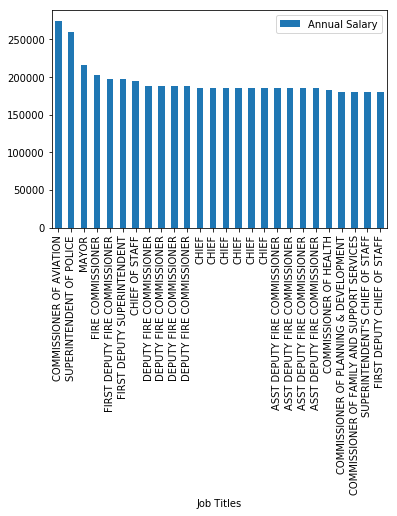

In [68]:
top.set_index('Job Titles')[['Name', 'Annual Salary']].head(26).plot.bar()
plt.show()

In [ ]:
selection = ['Job Titles', 'Full or Part-Time', 'Salary or Hourly', 'Annual Salary']

In [ ]:
selectedData = data[selection]
selectedData.columns

In [ ]:
selectedData.head()

In [ ]:
def cleanUpDF(df):
    for data in df.iterrows():
        for key in data[1].keys():
            type(data[1][key])
            val = data[1][key].replace(",","")
            data[1][key] = float(val)

cleanUpDF(selectedData)
selectedData.head()

In [ ]:
# Scale using Standard Scaling
dataScale = StandardScaler().fit_transform(selectedData)
dataScale

In [ ]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(dataScale)
print("model\n", model)

In [ ]:
centers = model.cluster_centers_
centers

In [ ]:
res = pd_centers(selection, centers)
res

In [48]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [49]:
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
df = rename_columns(df)
df['y'] = Y
df.head(3)

x0           x1           x2  y
0  586.565215   618.758589 -1384.510908  2
1  267.031246   350.118670 -1073.207781  2
2  -84.058273 -1683.152165   -21.339476  1

In [63]:
cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

scatter1 = dict(
    mode = "markers",
    name = "Cluster Studento",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster Naturale",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster Pagedangan",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
plotly.offline.iplot(fig, filename='mesh3d_sample')

/Users/animation-4/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/animation-4/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/animation-4/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/animation-4/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/animation-4/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/Users/animation-4/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning:

Method .as_matrix will